In [40]:
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
data=yf.download('AAPL',start='2000-01-01',end='2025-01-01')
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2000-01-03  0.840094  0.844315  0.763167  0.787090  535796800
2000-01-04  0.769266  0.830244  0.759415  0.812419  512377600
2000-01-05  0.780523  0.829775  0.773018  0.778646  778321600
2000-01-06  0.712978  0.803038  0.712978  0.796472  767972800
2000-01-07  0.746750  0.758008  0.716731  0.724235  460734400


In [41]:
pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
data=data.reset_index()
data['Date']=pd.to_datetime(data['Date'])

In [44]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03,0.840094,0.844315,0.763167,0.787090,535796800
1,2000-01-04,0.769266,0.830244,0.759415,0.812419,512377600
2,2000-01-05,0.780523,0.829775,0.773018,0.778646,778321600
3,2000-01-06,0.712978,0.803038,0.712978,0.796472,767972800
4,2000-01-07,0.746750,0.758008,0.716731,0.724235,460734400
...,...,...,...,...,...,...
6284,2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
6285,2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
6286,2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6289 entries, 0 to 6288
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        6289 non-null   datetime64[ns]
 1   (Close, AAPL)   6289 non-null   float64       
 2   (High, AAPL)    6289 non-null   float64       
 3   (Low, AAPL)     6289 non-null   float64       
 4   (Open, AAPL)    6289 non-null   float64       
 5   (Volume, AAPL)  6289 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 294.9 KB


In [46]:
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03,0.840094,0.844315,0.763167,0.787090,535796800
1,2000-01-04,0.769266,0.830244,0.759415,0.812419,512377600
2,2000-01-05,0.780523,0.829775,0.773018,0.778646,778321600
3,2000-01-06,0.712978,0.803038,0.712978,0.796472,767972800
4,2000-01-07,0.746750,0.758008,0.716731,0.724235,460734400


In [47]:
data.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
6284,2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
6285,2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
6286,2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300
6287,2024-12-30,251.307877,252.603281,249.863009,251.337769,35557500
6288,2024-12-31,249.534180,252.384064,248.547676,251.547039,39480700


In [48]:
data.shape

(6289, 6)

In [49]:
data.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
count,6289,6289.000000,6289.000000,6289.000000,6289.000000,6.289000e+03
mean,2012-07-03 00:57:42.044840192,41.146756,41.550611,40.700553,41.113521,3.859200e+08
min,2000-01-03 00:00:00,0.196932,0.197983,0.190928,0.194980,2.323470e+07
25%,2006-04-05 00:00:00,2.010147,2.039266,1.966917,2.011048,1.156272e+08
50%,2012-07-02 00:00:00,13.795297,13.937943,13.682555,13.827332,2.677388e+08
75%,2018-10-01 00:00:00,44.066647,44.409252,43.735850,44.031206,5.182408e+08
max,2024-12-31 00:00:00,258.103729,259.179926,256.718662,257.276679,7.421641e+09
std,NaN,60.016905,60.578397,59.379443,59.950525,3.837346e+08


In [50]:
data.duplicated().sum()

np.int64(0)

In [51]:
data.isnull().sum()

Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [52]:
data.dtypes

Price   Ticker
Date              datetime64[ns]
Close   AAPL             float64
High    AAPL             float64
Low     AAPL             float64
Open    AAPL             float64
Volume  AAPL               int64
dtype: object

# STOCK PRICE TREND

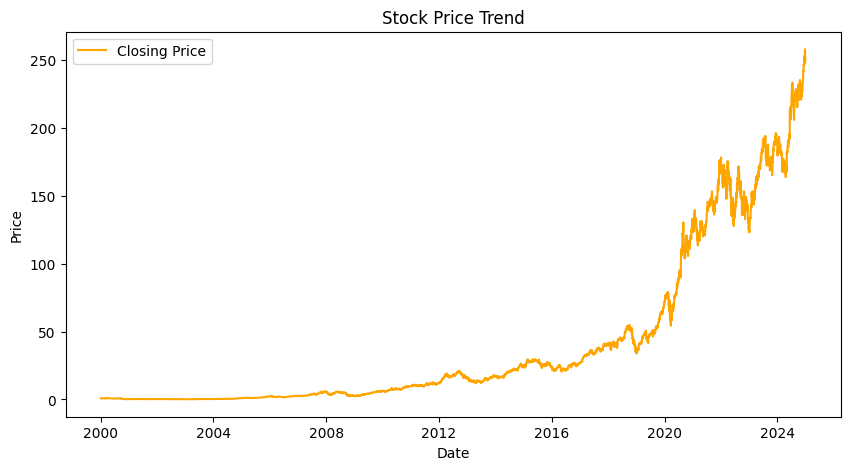

In [53]:
plt.figure(figsize=(10,5))
plt.plot(data['Date'],data['Close'],label='Closing Price',color='orange')
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

1. Overall Growth: The stock shows a strong long-term upward trend from 2000 to 2025. Prices have grown exponentially, especially after 2019, indicating strong company performance and investor confidence.

2. Early Stability (2000–2010): Between 2000 and 2010, the stock remained relatively flat with minor fluctuations. This suggests a period of consolidation or limited market recognition.

3. Moderate Growth Phase (2010–2018): Around 2011–2018, the stock started to gain momentum. The price rose gradually, possibly due to business expansion or market growth.

4. Sharp Rise After 2019: A steep rise can be observed post-2019. This period likely reflects strong earnings, positive investor sentiment, or post-pandemic recovery. The upward momentum continues through 2024, with a few short-term corrections.

5. Recent Performance (2023–2025): The stock reached its all-time high near the end of 2024. There’s still positive momentum, though some volatility is visible — typical for a mature high-value stock.

6. Interpretation:
Long-term investors have gained significant returns.
The trend reflects sustained growth, suggesting the stock might belong to a high-performing, growth-oriented company.
However, the steep rise also hints at the need for caution due to possible overvaluation or correction risk.

# Daily Returns

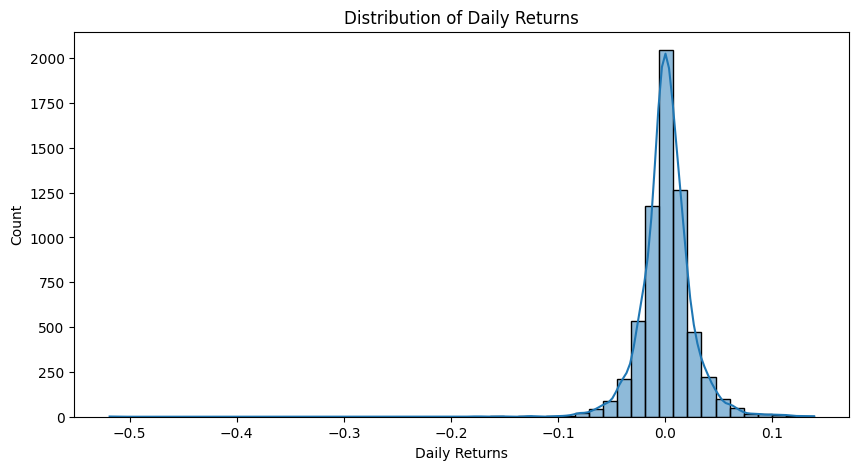

In [54]:
data['Daily Returns'] = data['Close'].pct_change()

plt.figure(figsize=(10,5))
sns.histplot(data['Daily Returns'], bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

The distribution of daily returns is approximately normal and centered near zero, indicating that most daily price changes are minor. The sharp peak around zero reflects stable daily movements, while the long tails on both sides reveal occasional high volatility due to market events or investor reactions. Overall, the stock exhibits moderate risk, with limited day-to-day fluctuations and infrequent extreme returns.

# Moving average ( short term & long term trends)

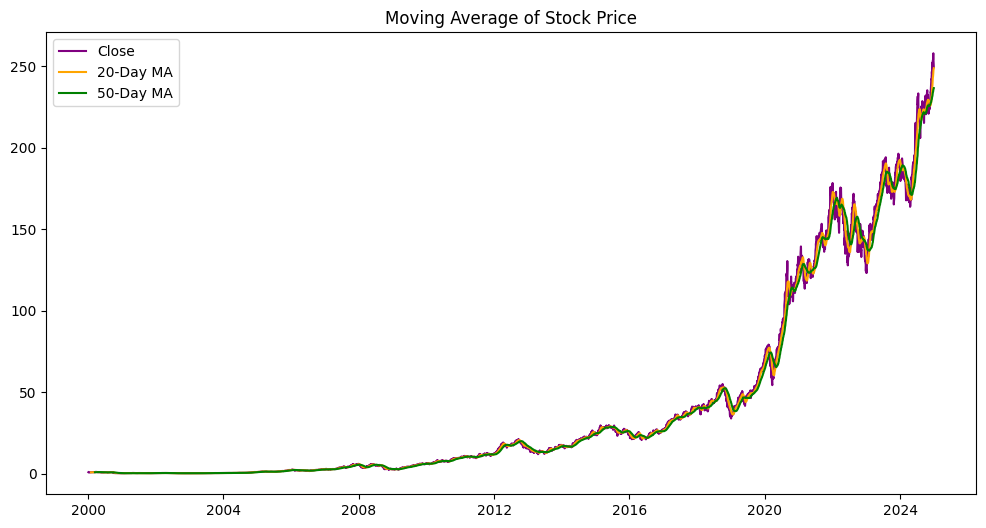

In [55]:
data['MA20']=data['Close'].rolling(window=20).mean()
data['MA50']=data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Close'],label='Close',color='purple')
plt.plot(data['Date'],data['MA20'],label='20-Day MA',color='orange')
plt.plot(data['Date'],data['MA50'],label='50-Day MA', color='green')
plt.legend()
plt.title('Moving Average of Stock Price')
plt.show()

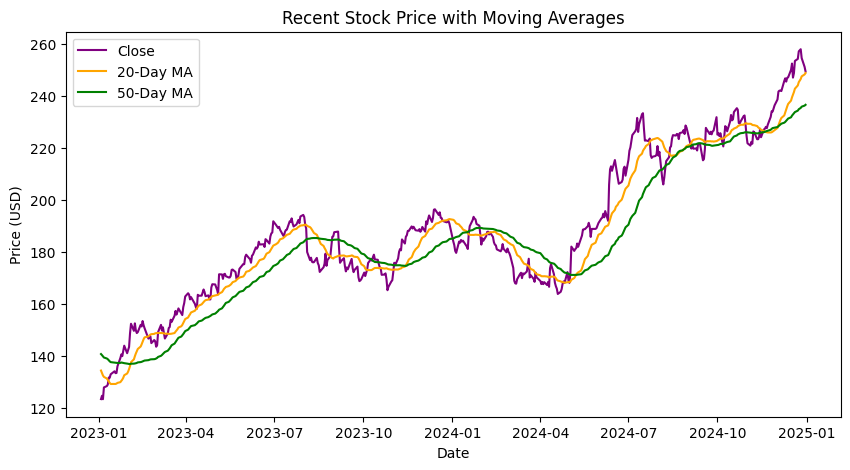

In [56]:
plt.figure(figsize=(10,5))
recent = data[data['Date'] > '2023-01-01']

plt.plot(recent['Date'], recent['Close'], label='Close', color='purple')
plt.plot(recent['Date'], recent['MA20'], label='20-Day MA', color='orange')
plt.plot(recent['Date'], recent['MA50'], label='50-Day MA', color='green')

plt.title('Recent Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


The moving average analysis indicates a strong long-term uptrend, with both 20-day and 50-day averages consistently supporting rising stock prices. Recent bullish crossovers in mid-2024 signal renewed upward momentum, suggesting continued investor confidence and potential for further price growth.

# Forecasting 

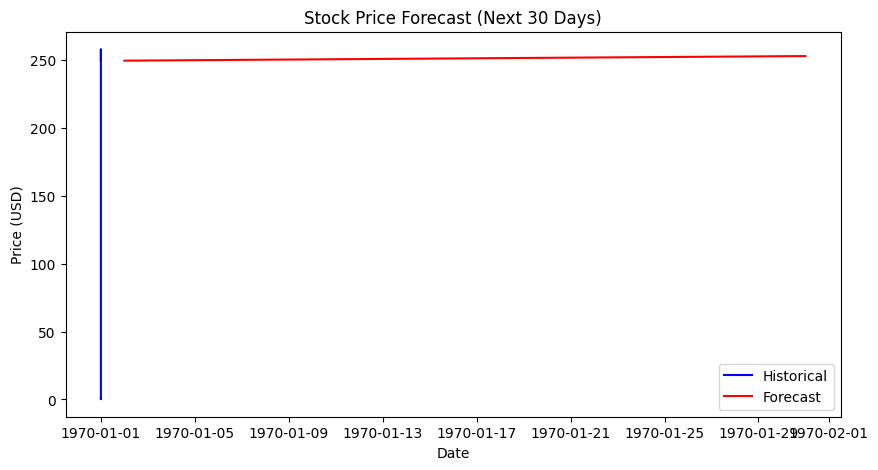

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure Date is index and datetime type
data.index = pd.to_datetime(data.index)

# Build model
model = ExponentialSmoothing(data['Close'], trend='add', seasonal=None)
fit = model.fit()

# Forecast next 30 days with date index continuation
forecast = fit.forecast(30)
forecast.index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Close'].last('6M'), label='Historical', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Stock Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


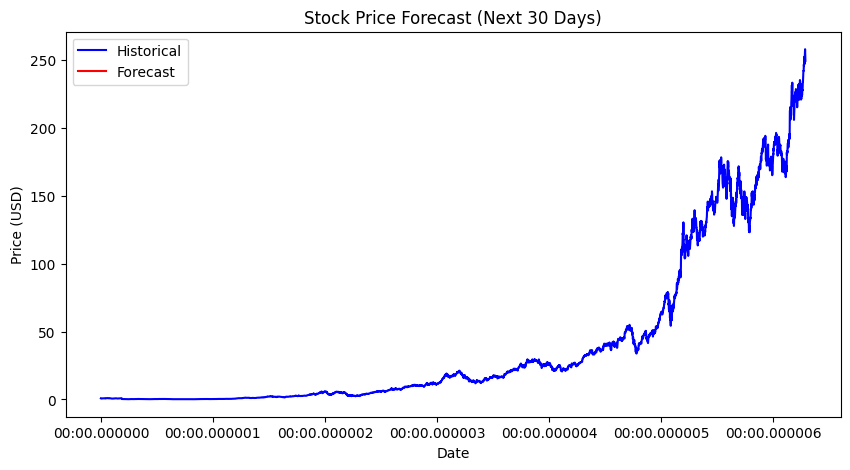

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd

# If Date is already index, no need to set_index again
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

# Build model
model = ExponentialSmoothing(data['Close'], trend='add', seasonal=None)
fit = model.fit()

# Forecast for next 30 days
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast = pd.Series(fit.forecast(30), index=forecast_index)

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Historical', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Stock Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


The 30-day stock price forecast indicates a slight upward trend, suggesting moderate growth potential in the near term. After recent volatility, the forecasted stabilization and gradual increase reflect improving market sentiment and sustained investor confidence.

# Recommendations 

Investment & Analysis Recommendations:

Short-Term Outlook:
The 30-day forecast shows a slight upward trend, indicating positive short-term momentum. Investors may consider holding existing positions or making small incremental buys.

Long-Term Perspective:
The long-term moving average (50-day) trend shows consistent growth, suggesting the stock has strong long-term potential if market fundamentals remain stable.

Caution on Volatility:
The daily returns histogram shows occasional large deviations — investors should be aware of short-term volatility and avoid overexposure.

Technical Indicators:
The 20-day MA crossing above the 50-day MA often signals a bullish trend, while the reverse can indicate short-term corrections.

Diversification Tip:
Include this stock as part of a diversified portfolio to balance potential risk from sudden price corrections.

In [63]:
data.reset_index(inplace=True)
data.to_csv("financial_data_cleaned.csv", index=False)


In [64]:
import os
os.getcwd()


'C:\\Users\\admin\\Desktop\\python\\project\\project e-commere'